_

        listBox1.DataSource = bindingSource1;
        list[2] = 777; // Изменяем значение в источнике данных.
        label1.Text = ((int) listBox1.Items[2]).ToString);
    }


В примере после создания источника с данными значимого типа и привязки элемента управления посредством соединителя к этому источнику, осуществляется изменение третьего элемента в источнике данных. Вывод на экран (в label1) третьего числа коллекции элемента управления показывает, что это число осталось прежним. Это состояние показано на рис. 18.4. Исходное значение также не изменилось.



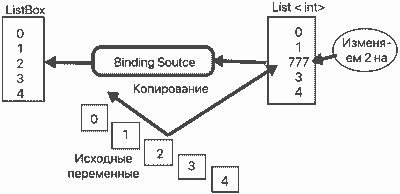

Рис. 18.4. Списки значимого типа

Аналогично ведёт себя и тип string, поскольку он является неизменяемым типом данных. Можно сделать вывод, что из элемента управления, привязанного к списку значимого типа, не обновив привязку, нельзя использовать значение - используйте метод ResetBindings или подобный ему. __Другим решением проблемы__ является использование коллекции `BindingList<T>` вместо `List<T>`. В этом случае можно привязать списочный элемент управления непосредственно к коллекции `bindingList` типа `BindingList<T>: comboBox1.DataSource = bindingList;`. __Если данные источника являются объектами__, то в результате привязки в коллекцию элемента управления и в коллекцию источника данных копируются (как на рис. 18.4) ссылки на эти объекты. В отличие от значимых типов ссылки можно удалить, добавить, но не изменить. Теперь, если какой-либо объект будет изменен, ссылка в коллекции элемента управления будет указывать на измененные значения. Этот процесс проиллюстрирован на рис. 18.5.

Страница 201

-------------

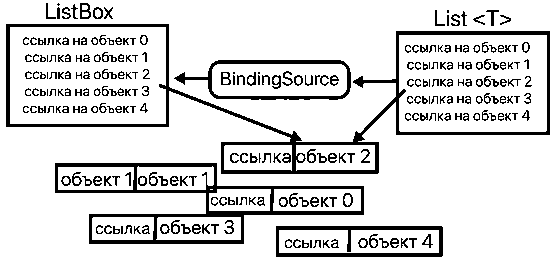

Рис. 18.5. Списки ссылочного типа

Из рис. 18.5 следует, что если какой-либо объект будет изменен, то даже если элемент управления будет отображать старое значение, ссылка будет указывать на тот же объект, но с измененным(и) полем(полями). Остается только его перерисовать, используя метод `ResetBindings`. __Комментарий__. Почему строки типа string, являясь ссылочными, ведут себя как значимый тип? Строка является встроенным и неизменяемым типом данных, то есть при попытке изменить строку с помощью методов или операции присваивания, создается новая строка. Рис. 18.4 иллюстрирует ситуацию, когда после изменения строки в источнике данных, будет создана новая строка, а в элементе управления останется старая.
$$***$$
В заключение отметим следующее: __Во-первых__, Благодаря своим преимуществам компонент `BindingSource` является предпочтительным способом привязки сложных элементов управления `Windows Forms` к источникам данных. __Во-вторых__, Не забывайте в нужном месте выполнять обновление привязки и отображения данных спомощью методов `ResetBindings`, `ResetCurrentItem` или `ResetItem`.

Страница 202

------

# 18.3. Простая привязка ОСНОВНЫЕ СВЕДЕНИЯ
Для привязки простого элемента управления к источнику данных следует использовать свойство `DataBindings` этого элемента управления. (Речь идет об элементах управления, у которых отсутствует свойство `DataSource`.) Свойство `DataBindings` используется для доступа к коллекции `ControlBindingsCollection` привязок свойств элемента управления к источникам данных. Привязка является объектом типа `Binding`, который определяет параметры привязки, то есть коллекция `ControlBindingsCollection` состоит из этих объектов. __В отличие__ от сложной привязки списочных элементов управления, простая привязка является двусторонней: изменяется источник — изменяется и элемент управления, изменяется элемент управления — изменяется и источник. Однако в обратную сторону — от элемента управления к источнику — привязка срабатывает не всегда, как хотелось бы. Предлагаю читателю поэкспериментировать со свойствами Text двух элементов управления TextBox, привязывая один к другому. __Достоинство привязки__ заключается в том, что где бы в программе не изменялось свойство элемента управления или его исгочинка данных, разработчик, если он установил привязку, освобождается от контроля за этими изменениями. __Замечание__. Следует понимать, что речь идет об источниках, свойства которых оповещают привязку об изменениях своих значений. К таким источникам относятся, например, свойства элементов управления. Если Вы привяжите элемент управления к свойству, не поддерживающему привязку, то это свойство не будет оповещать элемент управления о своих изменениях. __Свойство__ `DataBindings` определяет не один элемент, а коллекцию привязок. Причиной этого является то, что у одного элемента управления есть несколько свойств, каждое из которых может быть привязано к своему источнику данных. Например, для свойства `Text` элемента `label1` может использоваться одна привязка в коллекции, а для свойства `ForeColor` этого элемента — другая. Однако одно свойство элемента управления не может быть привязано к нескольким источникам данных. Для добавления объекта `Binding` в коллекцию используется метод `Add` коллекции, который имеет 7 перегрузок. Приведем первые четыре версии метода `Add`, используемые в данном учебнике: 


Страница 203

-----------


    public void Add(Binding binding)
добавляет заданный объект Binding в коллекцию.

    public Binding Add (string propertyName, Object dataSource, string dataMember)
создает привязку (объект Binding), используя имя свойства заданного элемента управления, источник данных и член данных (свойство), и добавляет эту привязку в коллекцию. 

    public Binding Add(string propertyName, Object dataSource, string data Member, bool formatting Enabled)
создает привязку заданного свойства элемента управления с заданным членом (свойством) указанного источника данных, используя сведения о том, включено ли форматирование, и добавляет привязку в коллекцию.

    public Binding Add(string propertyName, Object data Source, string dataMember, bool formatting Enabled, DataSourceUpdateMode update Mode)
создает привязку, связывающую заданное свойство элемента управления с заданным членом (свойством) указанного источника данных, при необходимости включая форматирование и учитывая настройку обновления. Привязка добавляется в коллекцию.

Страница 204

--------------

__Параметры__:
- __propertyName__ — имя свойства элемента управления, которое привязываем к источнику данных.
- __dataSource__ — объект `object`, предоставляющий источник данных. __dataMember__ - привязываемое свойство (член данных) или список источника данных. Параметр может быть пустой строкой (""), одним именем свойства или иерархией имен, разделенных точками. Пример иерархии имен: `Regions.regionsToCustomers.CustomerFirstName` Каждый член иерархии, как правило, является свойством
- __formattingEnabled__ — значение true разрешает форматирование выводимых данных, false — не разрешает.
- __dataSourceUpdateMode__ — член одноименного перечисления, указывает, в каких случаях должно производиться обновление ис точника данных при изменениях в связанном элементе управления. Члены перечисления `DataSourceUpdateMode`:
- __OnValidation__ — источник данных обновляется при проверке свойства элемента управления. После проверки у значения в свойстве элемента управления также будет изменен формат.
- __OnPropertyChanged__ - источник данных обновляется при каждом изменении свойства элемента управления.
- __Never__ — источник данных никогда не обновляется и значения, введенные в элементе управления, не анализируются, не проверяются и не переформатируются.

Страница 205

------------

Если в перечисленных выше версиях метода `Add` со второй по седьмую мы заменим в тексте подстроку `Binding Add` на `Binding`, то получим перегрузки конструктора `Binding` — шесть версий. __Первая версия__ метода `Add` принимает готовый объект `Binding`. В версиях со второй по седьмую методы `Add`, используя свои аргументы, сами создают объекты типа `Binding`, конструкторам которых передают те же аргументы и в той же последовательности. __Исходя из вышесказанного__, следующие два метода Add равносильны:

    label1.DataBindings.Add("Text", textBox1, "Text");
-И-
    
    label1.DataBindings.Add(new Binding("Text", textBox1, "Text"));
В приведенных выше вызовах метода `Add` осуществляется простая привязка свойства `Text` элемента управления `label1` к свойству `Text` элемента управления `textBox1`. __Несмотря на то что__ методы `Add` без «new Binding» короче в написании, среда разработки `Visual Studio`, генерируя привязку в файле `Form1.Designer.cs`, всегда использует первую версию мстода `Add`, создавая объект `Binding` внутри вызова (см. последний пример выше). На рис. 18.6 показана связь элементов простой привязки.

Страница 206

----------

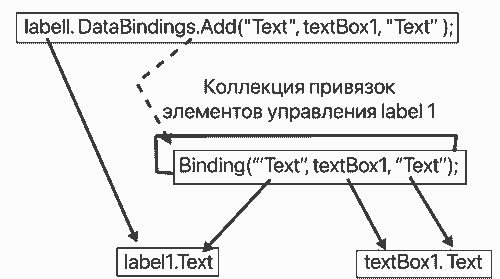

Рис. 18.6. Связь элементов простой привязки

# ПРИМЕРЫ ПРОСТОЙ ПРИВЯЗКИ



__Пример__. Свойство `Text` элемента управления `label1` привязывается к свойству `Text` элемента управления `textBox1`. В примере демонстрируется создание объекта `Binding` отдельным оператором.

    Binding bnd1 = new Binding("Text", textBox1, "Text", true);
    label1.DataBindings.Add(bnd1);
В результате такой привязки, при вводе символов в текстовое поле, они тут же отображаются в `label1`. __Пример__. Два свойства элемента управления `label1` — `Text` и `ForeColor` — привязываются к разным источникам. Создаётся коллекция привязок, состоящая из двух объектов `Binding`.

    label1.DataBindings.Add("Text", textBox1, "Text");
    label1.DataBindings.Add("ForeColor", textBox1, "ForeColor");

Страница 207

----------

__Пример__. В качестве источника данных используется другая привязка. Ниже показано, как `textBox2.Text` привязывается к `textBox1.Text`, а `label1.Text` — к `textBox2`. Text. По сути, элемент `textBox1` является общим источником данных.

    textBox2.DataBindings.Add("Text", textBox1, "Text");
    label1.DataBindings.Add("Text", textBox2, "Text");
На практике `label1` целесообразнее было бы привязать к `textBox1`.

__Пример__. Свойство `Text` элемента управления `textBox1` привязывается к свойству `P1` объекта `myObj` типа `MyClass`. (Определение класса `MyClass` дано в разделе 17.5.)

    MyClass myObj = new MyClass (10, 20); // Создаем объект.
    textBox1.DataBindings.Add("Text", myObi, "P1");
Свойство `P1` в примере будет изменяться вслед за изменением свойства `Text`, однако свойство `Text` не будет изменяться вслед за изменением свойства `Р1`.



__Пример__. Свойство `Text` элемента управления `textBox1` привязывается к свойству `S` формы.
    
    public stringS { get; set; }
    public Form1()
    {
        InitializeComponent();
        s = "123";
        textBox1.DataBindings.Add("Text", this, "S");
    }
Свойство `S` будет отслеживать изменения содержимого текстового поля.

__Пример__. Свойство BackColor формы (this) привязывается к свойству параметра FormBackColor объекта mySet.

    this.DataBindings.Add(
        BackColor"
        , mySet
        , "FormBackColor" true
        , DataSourceUpdateMode.OnPropertyChanged
    );
Параметры программы используются в технологии сохранения состояния программы в файле. Простая привязка свойств элементов управления к парамерам программы подробно рассматривается во втором томе учебника. Такая привязка не работает, если в методе `Add` не указан аргумент `DataSourceUpdateMode.OnPropertyChanged`.

__Пример 6__. Свойство `Text` элемента управления `TextBox` привязывается к свойству `Value` элемента управления `DateTimePicker`. 

    textBox4.DataBindings.Add("Text", dateTimePicker1, "Value");

Страница 208

----------

# ПРОСТАЯ ПРИВЯЗКА К СЛОЖНОМУ ОБЪЕКТУ
Класс `Binding` служит для создания и поддержания простой привязки свойства элемента управления не только к свойству отдельного объекта, но и к свойству текущего объекта в списке обьектов.

__Пример__. Свойство `Text` элемента управления `textBox1` привязывается к колонке студ таблицы «студенты» базы данных

    dataSet.textBox1.DataBinaings.Add("Text", dataset, "студенты.студІD");
    
Объект `dataSet` — это набор данных, включающий реляционные таблицы. Набор данных чаще всего является отображением базы данных в оперативную память. Таблица состоит из коллекции строк, одна из которых является текущей.

Страница 209

----------

__Пример__. Свойство `Text` элемента управления `textBox1` при вязывается к текущему элементу массива:

    Student[] студенты = new Student[3];
    студенты[0] = new Student ("Иванов", 125, "Москва");
    студенты[1] = new Student ("Петров", 1386, "Курск");
    студенты[2] = new Student ("Сидоров", 63, "Тула"):
    textBox1.DataBindings.Add("Text", студенты, "Name");

Свойство `Name` определяст фамилию студента. В этом при мере текущим объектом является первый (индекс 0). Для перехода к другому объекту нужно предпринять дополнительные усилия. Со сложными элементами управления типа `ListBox` или `ComboBox` таких проблем не возникает. __Если привязка__ выполняется к свойству текущего объекта в списке, и этот список привязан к источнику данных с помощью соединителя `BindingSource`, то рекомендуется этот соединитель использовать в качестве источника данных в простой привязке.



__Пример__. Свойство `Text` элемента управления `label1` привязывается к столбцу `ProductName` через компонент `BindingSource`, таблице который привязывается к таблице `Products` базы данных NorthwindDataSet.

    //bindingSource1 = new BindingSource(components);
    // Привяжем соединитель к базе данных.
    binding Source1.DataSource = NorthwindDataSet;
    // Выбираем конкретную таблицу.
    bindingSource1.DataMember = "Products";
    // Привяжем свойство label1.Text к столбцу ProductName таблицы,



Страница 210

--------